
# K Means Clustering Project 

W tym projekcie spróbujemy wykorzystać klaster KMeans do podzielenia uniwersytetów na dwie grupy, prywatną i publiczną. 

** Bardzo ważne jest, aby pamiętać, że w rzeczywistości mamy etykiety dla tego zestawu danych, ale NIE będziemy ich używać w algorytmie grupowania KMeans, ponieważ jest to algorytm uczenia nienadzorowanego.**  

Kiedy używamy algorytmu Kmeans w normalnych okolicznościach, nie mamy etykiet. W tym przypadku użyjemy etykiet, aby spróbować zorientować się, jak dobrze działał algorytm, ale zwykle nie robi się tego dla Kmeans - i dlatego Raport klasyfikacji i macierz pomyłek które robimy dla tego  projektu nie mają tak naprawdę sensu w realnym świecie!. ** 
___

## The Data

Użyjemy Data Frame z 777 obserwacjami następujących 18 zmiennych. nazwy kolumny zostawiam po angielsku zgodnie z treścią bazy 
* Private A factor with levels No and Yes indicating private or public university
* Apps Number of applications received
* Accept Number of applications accepted
* Enroll Number of new students enrolled
* Top10perc Pct. new students from top 10% of H.S. class
* Top25perc Pct. new students from top 25% of H.S. class
* F.Undergrad Number of fulltime undergraduates
* P.Undergrad Number of parttime undergraduates
* Outstate Out-of-state tuition
* Room.Board Room and board costs
* Books Estimated book costs
* Personal Estimated personal spending
* PhD Pct. of faculty with Ph.D.’s
* Terminal Pct. of faculty with terminal degree
* S.F.Ratio Student/faculty ratio
* perc.alumni Pct. alumni who donate
* Expend Instructional expenditure per student
* Grad.Rate Graduation rate

## Import Libraries

**Zaimportuj biblioteki, których zwykle używasz do analizy danych.**

In [1]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Get the Data

** Odczytaj plik "College Data" za pomocą read_csv. zastanow się, jak ustawić pierwszą kolumnę jako indeks. **

In [2]:
dataset = pd.read_csv('College_Data', index_col=0)

**Spawdż the head of the data**

In [4]:
dataset.head()

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Abilene Christian University,Yes,1660,1232,721,23,52,2885,537,7440,3300,450,2200,70,78,18.1,12,7041,60
Adelphi University,Yes,2186,1924,512,16,29,2683,1227,12280,6450,750,1500,29,30,12.2,16,10527,56
Adrian College,Yes,1428,1097,336,22,50,1036,99,11250,3750,400,1165,53,66,12.9,30,8735,54
Agnes Scott College,Yes,417,349,137,60,89,510,63,12960,5450,450,875,92,97,7.7,37,19016,59
Alaska Pacific University,Yes,193,146,55,16,44,249,869,7560,4120,800,1500,76,72,11.9,2,10922,15


** Spawdź info() i describe() metody .**

In [5]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
Index: 777 entries, Abilene Christian University to York College of Pennsylvania
Data columns (total 18 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Private      777 non-null    object 
 1   Apps         777 non-null    int64  
 2   Accept       777 non-null    int64  
 3   Enroll       777 non-null    int64  
 4   Top10perc    777 non-null    int64  
 5   Top25perc    777 non-null    int64  
 6   F.Undergrad  777 non-null    int64  
 7   P.Undergrad  777 non-null    int64  
 8   Outstate     777 non-null    int64  
 9   Room.Board   777 non-null    int64  
 10  Books        777 non-null    int64  
 11  Personal     777 non-null    int64  
 12  PhD          777 non-null    int64  
 13  Terminal     777 non-null    int64  
 14  S.F.Ratio    777 non-null    float64
 15  perc.alumni  777 non-null    int64  
 16  Expend       777 non-null    int64  
 17  Grad.Rate    777 non-null    int64  
dtypes: 

In [6]:
dataset.describe()

,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
count,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.000000,777.00000
mean,3001.638353,2018.804376,779.972973,27.558559,55.796654,3699.907336,855.298584,10440.669241,4357.526384,549.380952,1340.642214,72.660232,79.702703,14.089704,22.743887,9660.171171,65.46332
std,3870.201484,2451.113971,929.176190,17.640364,19.804778,4850.420531,1522.431887,4023.016484,1096.696416,165.105360,677.071454,16.328155,14.722359,3.958349,12.391801,5221.768440,17.17771
min,81.000000,72.000000,35.000000,1.000000,9.000000,139.000000,1.000000,2340.000000,1780.000000,96.000000,250.000000,8.000000,24.000000,2.500000,0.000000,3186.000000,10.00000
25%,776.000000,604.000000,242.000000,15.000000,41.000000,992.000000,95.000000,7320.000000,3597.000000,470.000000,850.000000,62.000000,71.000000,11.500000,13.000000,6751.000000,53.00000
50%,1558.000000,1110.000000,434.000000,23.000000,54.000000,1707.000000,353.000000,9990.000000,4200.000000,500.000000,1200.000000,75.000000,82.000000,13.600000,21.000000,8377.000000,65.00000
75%,3624.000000,2424.000000,902.000000,35.000000,69.000000,4005.000000,967.000000,12925.000000,5050.000000,600.000000,1700.000000,85.000000,92.000000,16.500000,31.000000,10830.000000,78.00000
max,48094.000000,26330.000000,6392.000000,96.000000,100.000000,31643.000000,21836.000000,21700.000000,8124.000000,2340.000000,6800.000000,103.000000,100.000000,39.800000,64.000000,56233.000000,118.00000


## EDA

Czas stworzyć wizualizacje danych! 

** Utwórz wykres scatterplot: Grad.Rate versus Room.Board, ustal kolor punktów zaleznych od wartosci kolumny Private . **

<AxesSubplot:xlabel='Grad.Rate', ylabel='Room.Board'>

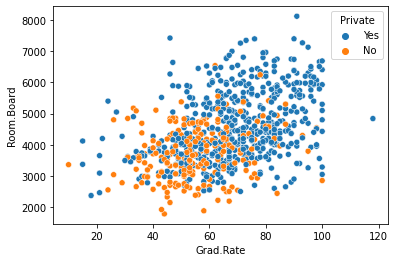

In [7]:
sns.scatterplot(data=dataset, x="Grad.Rate", y="Room.Board", hue="Private")

**Utwórz kolejny scatterplot: F.Undergrad versus Outstate. Ustal kolor punktów zaleznych od wartosci kolumny Private.**

<AxesSubplot:xlabel='F.Undergrad', ylabel='Outstate'>

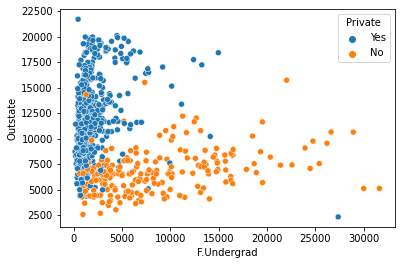

In [8]:
sns.scatterplot(data=dataset, x="F.Undergrad", y="Outstate", hue="Private")

** Utwórz stacked histogram pokazując wartości Czesne (Tuition) z poza stanem na podstawie kolumny prywatnej. Spróbuj to zrobić, używając  [sns.FacetGrid](https://stanford.edu/~mwaskom/software/seaborn/generated/seaborn.FacetGrid.html). Jeśli to zbyt trudne, sprawdź, czy możesz to zrobić, używając dwóch instancji pandas.plot(kind='hist'). **

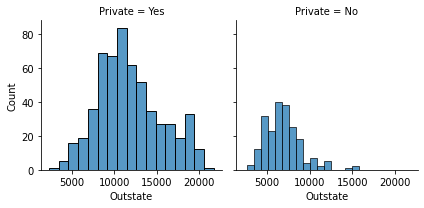

In [9]:
g = sns.FacetGrid(dataset, col="Private")
g.map_dataframe(sns.histplot, x="Outstate")

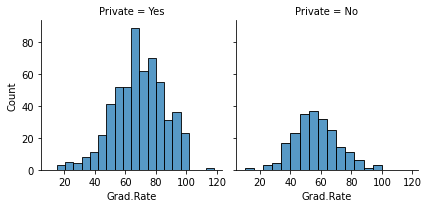

In [10]:
g = sns.FacetGrid(dataset, col="Private")
g.map_dataframe(sns.histplot, x="Grad.Rate")

** Wydaje się, że istnieje jedna prywatna szkoła, której wskaźnik ukończenia studiów jest wyższy niż 100%. Jak nazywa się ta szkoła? podaj pełny rekord **

In [11]:
dataset.loc[dataset["Grad.Rate"] > 100]

,Private,Apps,Accept,Enroll,Top10perc,Top25perc,F.Undergrad,P.Undergrad,Outstate,Room.Board,Books,Personal,PhD,Terminal,S.F.Ratio,perc.alumni,Expend,Grad.Rate
Cazenovia College,Yes,3847,3433,527,9,35,1010,12,9384,4840,600,500,22,47,14.3,20,7697,118


** Ustaw wskaźnik ukończenia szkoły na 100, aby eliminować szkoły z wskaznikiem ukończenia studiów poyżej 100 - UWAGA, Podczas wykonywania tej operacji może pojawić się ostrzeżenie, a nie błąd.  Użyj operacji dataframe lub po prostu ponownie wykonaj wizualizację histogramu, aby upewnić się, że operacja ustawienia wskaznika rzeczywiście została wykonana.**

In [12]:
dataset_real = dataset.loc[dataset["Grad.Rate"] <= 100]

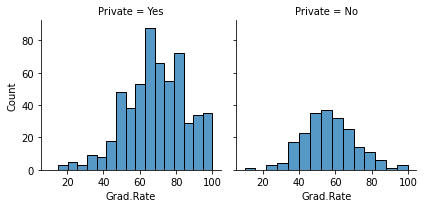

In [13]:
g = sns.FacetGrid(dataset_real, col="Private")
g.map_dataframe(sns.histplot, x="Grad.Rate")

## Tworzenie K Means Cluster 

Teraz jest czas, aby utworzyć klastry!

** Importuj KMeans z SciKit Learn.** 

In [2]:
from sklearn.cluster import KMeans

** Utwórz instancję modelu K Means z 2 klastrami. **

In [3]:
kmeans=KMeans(n_clusters=2)

**Dopasuj model do wszystkich danych poza Private label.**

In [13]:
dataset1 = dataset.drop(columns =['Private'])

In [15]:
kmeans.fit(dataset1)

KMeans(n_clusters=2)

** przedstaw wektory centrum klastrów **

In [16]:
kmeans.cluster_centers_

array([[1.81323468e+03, 1.28716592e+03, 4.91044843e+02, 2.53094170e+01,
        5.34708520e+01, 2.18854858e+03, 5.95458894e+02, 1.03957085e+04,
        4.31136472e+03, 5.41982063e+02, 1.28033632e+03, 7.04424514e+01,
        7.78251121e+01, 1.40997010e+01, 2.31748879e+01, 8.93204634e+03,
        6.51195815e+01],
       [1.03631389e+04, 6.55089815e+03, 2.56972222e+03, 4.14907407e+01,
        7.02037037e+01, 1.30619352e+04, 2.46486111e+03, 1.07191759e+04,
        4.64347222e+03, 5.95212963e+02, 1.71420370e+03, 8.63981481e+01,
        9.13333333e+01, 1.40277778e+01, 2.00740741e+01, 1.41705000e+04,
        6.75925926e+01]])

## Evaluation

Nie ma idealnego sposobu oceny grupowania, jeśli nie masz etykiet (nazwy), jednak ponieważ jest to tylko ćwiczenie, mamy etykiety, więc wykorzystujemy to do oceny naszych klastrów. --- W rzeczywistości nie mamy takiego luksusu ponieważ nasze zadanie polega na tworzeniu odpowiednich ilości klastrów ---.

** Utwórz nową kolumnę dla df o nazwie „Klaster”, ustaw 1 dla szkoły prywatnej i 0 dla szkoły publicznej.** 

In [29]:
private_column = dataset.iloc[:, 0]
Klaster = []
for i in range(0, len(dataset.index)):
    if private_column[i] == 'Yes':
        Klaster.append(1)
    else:
        Klaster.append(0)
dataset['Klaster'] = Klaster

** Utwórz confusion matrix i classification report, aby zobaczyć, jak dobrze działało grupowanie K Means bez nadania im żadnych etykiet.**

In [44]:
from sklearn.metrics import confusion_matrix, classification_report
cm = confusion_matrix(kmeans.labels_, dataset['Klaster'])
print(cm)

[[138 531]
 [ 74  34]]


In [45]:
print(classification_report(kmeans.labels_, dataset['Klaster']))

              precision    recall  f1-score   support

           0       0.65      0.21      0.31       669
           1       0.06      0.31      0.10       108

    accuracy                           0.22       777
   macro avg       0.36      0.26      0.21       777
weighted avg       0.57      0.22      0.28       777



jeśli wszystko wyszlo tak jak trzeba to zauważysz, że nie tak źle, biorąc pod uwagę, że algorytm wykorzystuje wyłącznie funkcje do pogrupowania uniwersytetów w 2 odrębne grupy! Mam nadzieję, że  dostrzegałes/łas użyteczność K Means do grupowania danych bez etykiet! 